Primeras filas del dataset:
   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          1   77516          1             13               1   
1   50          0   83311          1             13               0   
2   38          3  215646          3              9               1   
3   53          3  234721          3              7               0   
4   28          3  338409          1             13               0   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           4             1     4    1             0             0   
3           4             0     2    1             0             0   
4           7             5     2    0             0             0   

   hours-per-week  native-country  income  
0              40               0       0  
1              13               0   

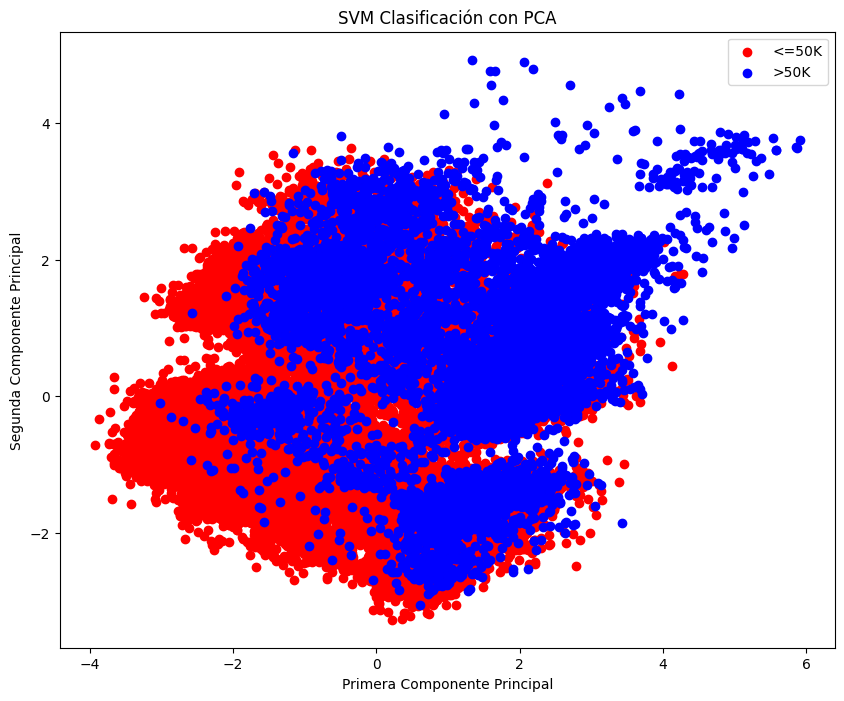

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset limpio sin cabecera
data = pd.read_csv('dataset_limpio.csv', header=None)

# Asignar nombres a las columnas
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']
data.columns = columns

# Imprimir las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Separar características y etiquetas
X = data.drop('income', axis=1)
y = data['income']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='poly', random_state=42)
svm_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo SVM: {accuracy:.4f}")
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar los resultados
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='<=50K')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='>50K')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('SVM Clasificación con PCA')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset limpio
data = pd.read_csv('dataset_limpio.csv')

# Separar características y etiquetas
X = data.drop('income', axis=1)
y = data['income']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='poly', random_state=42)
svm_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.4f}")
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar los resultados
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='<=50K')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='>50K')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('SVM Clasificación con PCA')
plt.legend()
plt.show()